# The Stats Fight: Messi vs. C. Ronaldo

#### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

#### Importing the data, cleaning, adding calculations

The data set can be downloaded here: <a>https://data.world/makeovermonday/2020w15-messi-vs-ronaldo-stats</a>

In [2]:
df = pd.read_excel('MessiRonaldo.xlsx')

In [3]:
df.head()

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins
0,2017-18,Messi,34,12,36,2996,6,2,10,783
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170
2,2016-17,Messi,37,9,34,2832,11,2,9,810
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200
4,2015-16,Messi,26,16,33,2729,6,1,7,630


In [4]:
df.columns = [c.lower() for c in df.columns]

In [5]:
df['liga_goals_per_90_mins'] = df['liga_goals'] / df['liga_mins'] * 90

In [6]:
df['liga_asts_per_90_mins'] = df['liga_asts'] / df['liga_mins'] * 90
df['cl_goals_per_90_mins'] = df['cl_goals'] / df['cl_mins'] * 90
df['cl_asts_per_90_mins'] = df['cl_asts'] / df['cl_mins'] * 90

In [7]:
df.head()

,season,player,liga_goals,liga_asts,liga_aps,liga_mins,cl_goals,cl_asts,cl_aps,cl_mins,liga_goals_per_90_mins,liga_asts_per_90_mins,cl_goals_per_90_mins,cl_asts_per_90_mins
0,2017-18,Messi,34,12,36,2996,6,2,10,783,1.021362,0.360481,0.689655,0.229885
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170,1.018720,0.195908,1.153846,0.230769
2,2016-17,Messi,37,9,34,2832,11,2,9,810,1.175847,0.286017,1.222222,0.222222
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200,0.884434,0.212264,0.900000,0.375000
4,2015-16,Messi,26,16,33,2729,6,1,7,630,0.857457,0.527666,0.857143,0.142857


In [8]:
df_new = df[['season', 'player', 'liga_goals_per_90_mins','liga_asts_per_90_mins', 'cl_goals_per_90_mins', 'cl_asts_per_90_mins']]

In [9]:
df_new.head()

,season,player,liga_goals_per_90_mins,liga_asts_per_90_mins,cl_goals_per_90_mins,cl_asts_per_90_mins
0,2017-18,Messi,1.021362,0.360481,0.689655,0.229885
1,2017-18,Ronaldo,1.018720,0.195908,1.153846,0.230769
2,2016-17,Messi,1.175847,0.286017,1.222222,0.222222
3,2016-17,Ronaldo,0.884434,0.212264,0.900000,0.375000
4,2015-16,Messi,0.857457,0.527666,0.857143,0.142857


In [10]:
df_new_2017 = df_new[df_new['season']=='2017-18']
df_new_2017

,season,player,liga_goals_per_90_mins,liga_asts_per_90_mins,cl_goals_per_90_mins,cl_asts_per_90_mins
0,2017-18,Messi,1.021362,0.360481,0.689655,0.229885
1,2017-18,Ronaldo,1.018720,0.195908,1.153846,0.230769


## Trying out the Radar Chart: Take 1

Tutorial: <a>https://typewind.github.io/2017/09/29/radar-chart/</a>

In [26]:
labels = np.array(['liga_goals_per_90_mins','liga_asts_per_90_mins', 'cl_goals_per_90_mins', 'cl_asts_per_90_mins'])
stats = df_new_2017.loc[1,labels].values

In [29]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle

# close the plot
stats = np.concatenate((stats,[stats[0]]))  # Closed
angles = np.concatenate((angles,[angles[0]]))  # Closed

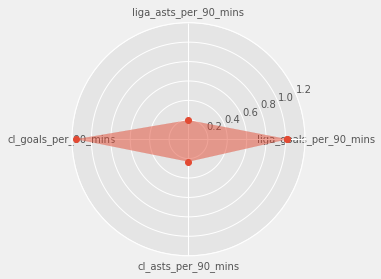

In [50]:
fig = plt.figure(figsize=(6,4))
plt.style.use('ggplot')

ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, stats, 'o-', linewidth=0.1)  # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.5)  # Fulfill the area

ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
#ax.set_title([df_new_2017.loc[1,"Name"]])  
#ax.set_rlim(0,250)
ax.grid(True)

## Trying out the Radar Chart: Take 2

Tutorials: 
* <a>https://python-graph-gallery.com/390-basic-radar-chart/</a>
* <a>https://python-graph-gallery.com/391-radar-chart-with-several-individuals/</a>
* <a>https://python-graph-gallery.com/392-use-faceting-for-radar-chart/</a>
* <a>https://www.pythoncharts.com/2019/04/16/radar-charts/</a>

#### One year, one player

In [13]:
# number of variables
categories=list(df_new_2017)[2:]
N = len(categories)

In [14]:
categories

['liga_goals_per_90_mins',
 'liga_asts_per_90_mins',
 'cl_goals_per_90_mins',
 'cl_asts_per_90_mins']

In [270]:
# here I decided to rename the categories
categories = ['LG', 'LA', 'CLG', 'CLA']

In [16]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = df_new_2017.loc[0].drop(['season', 'player']).values.flatten().tolist()
values += values[:1]
values

[1.0213618157543392,
 0.3604806408544727,
 0.689655172413793,
 0.2298850574712644,
 1.0213618157543392]

In [17]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

In [21]:
angles

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

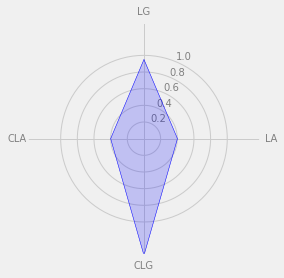

In [119]:
# Initialise the spider plot
plt.style.use('fivethirtyeight')
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=10)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction('clockwise')
ax.set_thetagrids(np.degrees(angles), categories)

# Draw ylabels
#ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1.0], ['0.2','0.4','0.6','0.8','1.0'], color="grey", size=10 )
plt.ylim(0,1.4)
 
# Plot data
ax.plot(angles, values, linewidth=0.5, linestyle='solid', color='b')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.2)



#### One year, two players

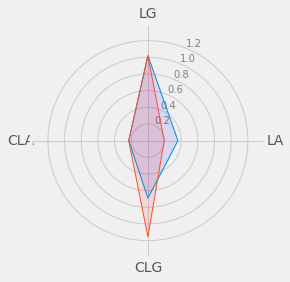

In [99]:
# ------- PART 1: Create background
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
    
#ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction('clockwise')
ax.set_thetagrids(np.degrees(angles), categories)

# Draw ylabels
#ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1.0,1.2], ['0.2','0.4','0.6','0.8','1.0','1.2'], color="grey", size=10 )
plt.ylim(0,1.4)
 
 
## ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values = df_new_2017.loc[0].drop(['season', 'player']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Messi")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = df_new_2017.loc[1].drop(['season', 'player']).values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Ronaldo")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


#### Multiple years, two players

In [107]:
df_messi = df_new[df_new['player']=='Messi'].sort_values('season', ascending=True).reset_index(drop=True)
df_ronaldo = df_new[df_new['player']=='Ronaldo'].sort_values('season', ascending=True).reset_index(drop=True)

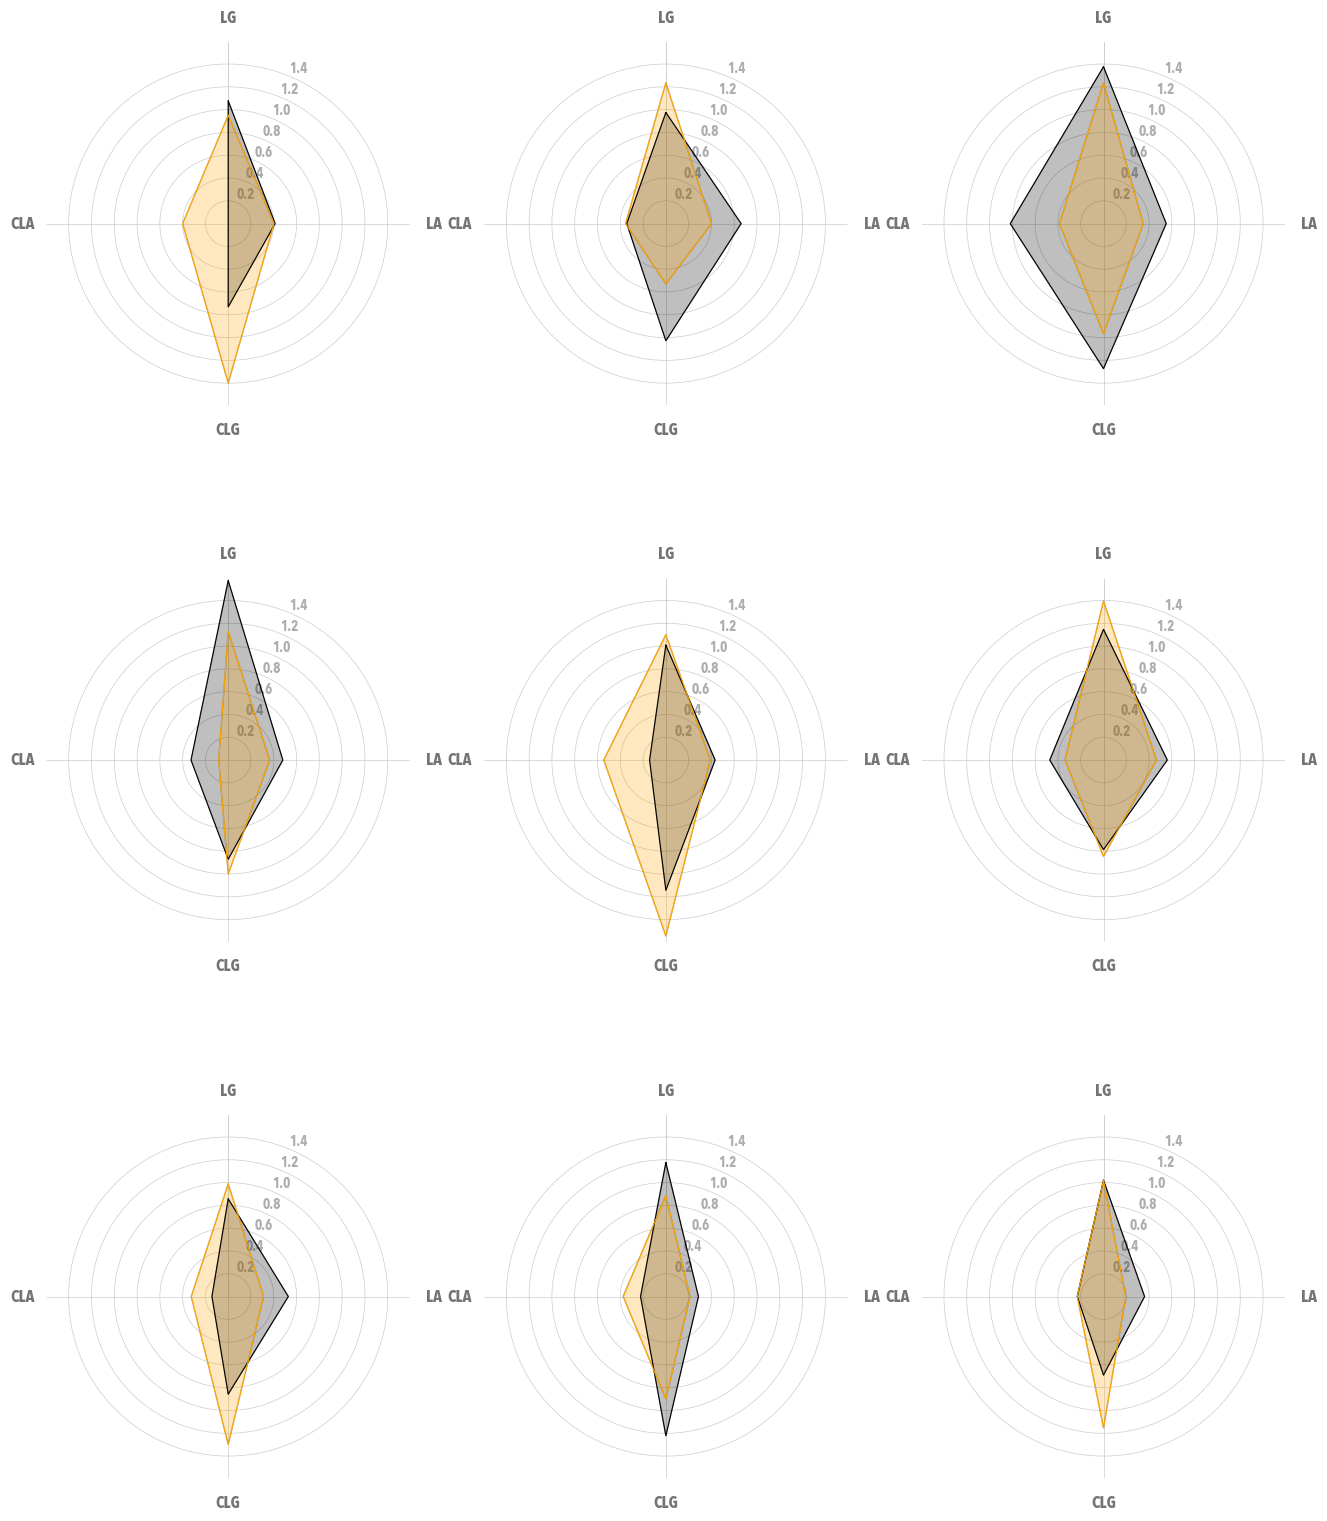

In [269]:
# ------- PART 1: Define a function that will create the plot

def make_spider(row):
 
    #number of variables
    #categories=list(df)[1:]
    N = 4
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='#747477', size=12, fontname='Avenir Next Condensed', fontweight='medium')
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction('clockwise')
    ax.set_thetagrids(np.degrees(angles), categories)
 
    # Draw ylabels
    #ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4], ['0.2','0.4','0.6','0.8','1.0','1.2','1.4'], color="#ADAEB2", 
               size=10, fontname='Avenir Next Condensed', fontweight='light' )
    plt.ylim(0,1.6)
 
    # Messi
    values=df_messi.loc[row].drop(['season', 'player']).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=0.8, linestyle='solid', label="Messi", color='black')
    ax.fill(angles, values, 'black', alpha=0.25)
    
    # Ronaldo
    values=df_ronaldo.loc[row].drop(['season', 'player']).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=0.8, linestyle='solid', label="Ronaldo", color='orange')
    ax.fill(angles, values, 'orange', alpha=0.25)
    
    #ax.grid(color='#ECECEE')
    ax.spines['polar'].set_color('#FFFFFF')
    ax.set_facecolor('#FFFFFF')
    
    # Add a title
    #plt.title(title, size=11, y=1.1) #color=color
    plt.savefig('radar_multiples.jpg', quality=95)
    plt.savefig('radar_multiples.png', dpi=200)
    #plt.savefig('radar_multiples.svg')
    

 
# ------- PART 2: Run a loop that creates all plots
# initialize the figure
my_dpi=100
plt.style.use('seaborn-ticks')

plt.figure(figsize=(1600/my_dpi, 1900/my_dpi), dpi=my_dpi, facecolor='w')   

# Loop to plot
for row in range(0, 9):
    make_spider(row=row) 